In [1]:
using AutomotiveDrivingModels
using AutoViz
using Reactive
using Interact

#import PyPlot

# Types

## Initialize Parameters

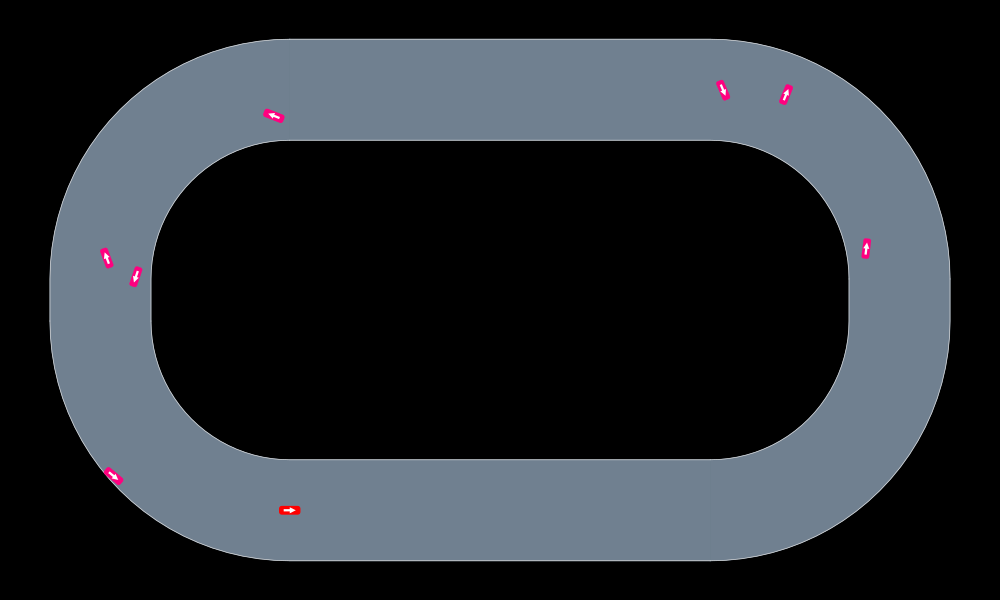

In [7]:
# scene parameters
scene = Scene()
framerate = 24
Δt = 1.0/framerate # size of rendering timesteps
n_integration_sub_steps = 3 # sub steps for smoother integration
context = IntegratedContinuous(Δt, n_integration_sub_steps) # integrated continuous context

models = Dict{Int, DriverModel}()
carcolors = Dict{Int, Colorant}()
base_speed= 20.0

#car parameters
car_length = 4.8 # front wheel to back wheel
car_width = 2.5
v⁰  = 0.0 # initial velocity
δ⁰ = 0.0 # initical steering angle

#track parameters
lane_width = 8.0*DEFAULT_LANE_WIDTH
radius = 45.0
edge_buffer = 0.25
T_MAX = lane_width/2.0 - car_width/2.0 - edge_buffer # max allowable projection distance from center of lane

#initialize track

roadway = gen_stadium_roadway(1, radius=radius, lane_width=lane_width)

# obstacles
obstacle_IDs = Set{Int}()
for i in 2:8
    push!(obstacle_IDs, i)
    ind_i = rand([i for i in 1:25])
    ind_t = rand([i/100.0 for i in 1:100])
    t = rand([i/10.0 for i in -10:10])*lane_width/2.0
    ϕ = rand([i/20.0 for i in -20:20])*Float64(π)
    segment = rand([i for i in 1:4])
    roadind = RoadProjection(CurveProjection(CurveIndex(ind_i, ind_t), t, ϕ), LaneTag(segment,1))
    vehstate = VehicleState(Frenet(roadind, roadway), roadway, 0.0)
    vehdef = VehicleDef(i, AgentClass.CAR, 4.8, 1.8)
    push!(scene, Vehicle(vehstate, vehdef))
end

roadind1 = RoadIndex(proj(VecSE2(0.0,-1*DEFAULT_LANE_WIDTH,0.0), roadway))
vehstate1 = VehicleState(Frenet(roadind1, roadway), roadway, 0.0)
vehdef1 = VehicleDef(1,AgentClass.CAR, 4.8, 1.8)
push!(scene,Vehicle(vehstate1, vehdef1))
models[1] = Tim2DDriver(context, rec=SceneRecord(1,context.Δt, 1))

#set_desired_speed!(models[1], 30.0 + 20*rand())
carcolors[1] = colorant"red"

actions = Array(DriveAction, length(scene))

render(scene, roadway, cam=FitToContentCamera(), car_colors=carcolors)

In [9]:
obstacle_IDs

Set([7,4,2,3,5,8,6])

In [11]:

for id in obstacle_IDs
    pos = scene.vehicles[id].state.posG
    actions[id] = 
    println(pos)
end



VecSE2({103.060, 99.892}, 5.116)
VecSE2({-3.770, 93.793}, 2.767)
VecSE2({-36.580, 55.527}, 4.384)
VecSE2({-41.878, 8.128}, 5.591)
VecSE2({-43.498, 59.975}, 1.928)
VecSE2({0.006, 0.000}, 6.283)
VecSE2({137.097, 62.228}, 1.449)


In [13]:
length(scene)

8